In [1]:
!pip uninstall chainer

Cannot uninstall requirement chainer, not installed


In [4]:
!pip install chainer



  Using cached chainer-2.0.2.tar.gz
    100% |████████████████████████████████| 61kB 3.1MB/s ta 0:00:01
    100% |████████████████████████████████| 6.2MB 122kB/s eta 0:00:01    55% |█████████████████▋              | 3.4MB 29.2MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 7.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for chainer ... done
  Stored in directory: /root/.cache/pip/wheels/49/7a/65/011f3cb35e105e60f018f6ac887e87cccf4bbc4bf5342fdb4e
  Running setup.py bdist_wheel for filelock ... done
  Stored in directory: /root/.cache/pip/wheels/c5/ae/6d/d0eeb68075b74ef351d8081e7850c70c535474119d042d1fe1
Successfully built chainer filelock


In [62]:
import chainer

In [63]:
chainer.__version__


'2.0.2'

In [64]:
import chainer

In [65]:
chainer.__version__

'2.0.2'

In [66]:
import chainer.links as L

In [67]:
link = L.Linear(3,2)

In [68]:
link.W

variable W([[-0.46143952,  0.39624   , -0.13231058],
            [ 0.00580973,  0.1713419 ,  0.07678494]])

In [69]:
#chainer
link.W.data

array([[-0.46143952,  0.39624   , -0.13231058],
       [ 0.00580973,  0.1713419 ,  0.07678494]], dtype=float32)

In [70]:
import numpy as np # number calc


In [71]:
x = np.array([[1,2,3]], dtype=np.float32)
print(x)

[[ 1.  2.  3.]]


In [72]:
# u no atai no keisan
u = link(x)
print(u)

variable([[-0.0658913   0.57884836]])


In [73]:
# z no keisan
import chainer.functions as F

F.relu(u)

variable([[ 0.        ,  0.57884836]])

In [74]:
class NN(chainer.Chain):
    # model
    def __init__(self):
        super().__init__()
        with self.init_scope():
            self.l1 = L.Linear(1,100)
            self.l2 = L.Linear(100,30)
            self.l3 = L.Linear(30,1)
            
    # function
    def __call__(self, x, t):
        y = self.predict(x)
        loss = F.mean_squared_error(t, y)
        return loss
    
    # predict result
    def predict(self, x):
        u1 = self.l1(x)
        z1 = F.relu(u1)
        u2 = self.l2(z1)
        z2 = F.relu(u2)
        y = self.l3(z2)
        return y

In [75]:
model = NN()

In [76]:
from chainer import optimizers
#optimizer = optimizers.SGD()
optimizer = optimizers.Adam()
optimizer.setup(model)

In [77]:
# create data
x = np.linspace(-3, 3, 100).reshape(100, 1)
t = np.sin(x)

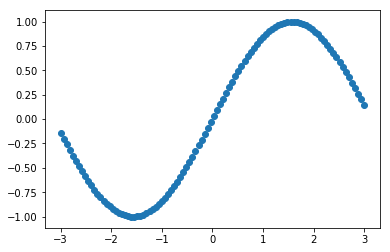

In [78]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [79]:
x.shape

(100, 1)

In [80]:
x

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [ ]:
# chainer 
from chainer import Variable

#float32
x = np.array(x, dtype=np.float32)
t = np.array(t, dtype=np.float32)

# numpy -> chainer
x_ch = Variable(x)
t_ch = Variable(t)

In [ ]:
losses = []
# chainer learnin g
for i in range(1000):
    model.cleargrads
    loss = model(x_ch, t_ch)
    loss.backward()
    optimizer.update()
    # 追記：プロットするように保存しておく
    losses.append(loss.data)


In [ ]:
    plt.plot(losses)
    plt.show()